In [9]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('../../data/ST001937_AN003150.csv')

Dropping not needed columns and renaming the Phenotypes column to labels

In [10]:
df = df.drop(['Sample ID', 'RAW_FILE_NAME'], axis=1)
df['Phenotypes'] = df['Phenotypes'].apply(lambda x: 0 if x == 'Healthy Controls' else 1 if x == 'Maligant SPNS' else 2)

Filling missing values with the mean

In [11]:
df.fillna(df.mean(), inplace=True)

Performing random forest algo and plotting the results

Average Accuracy (k=3): 0.86


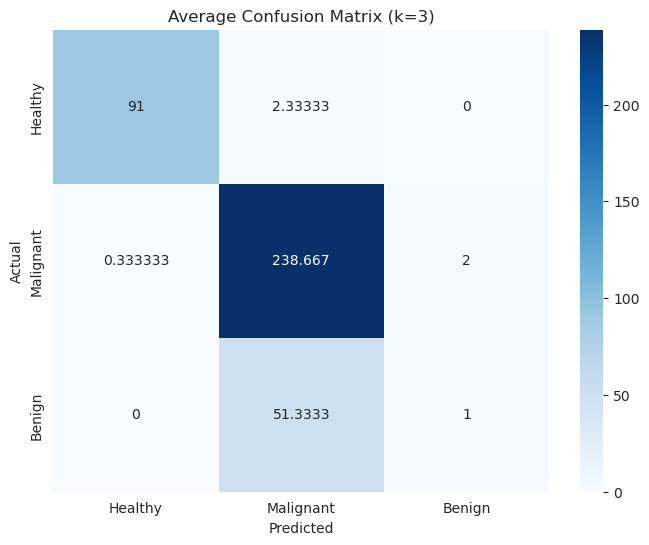

Average Accuracy (k=5): 0.86


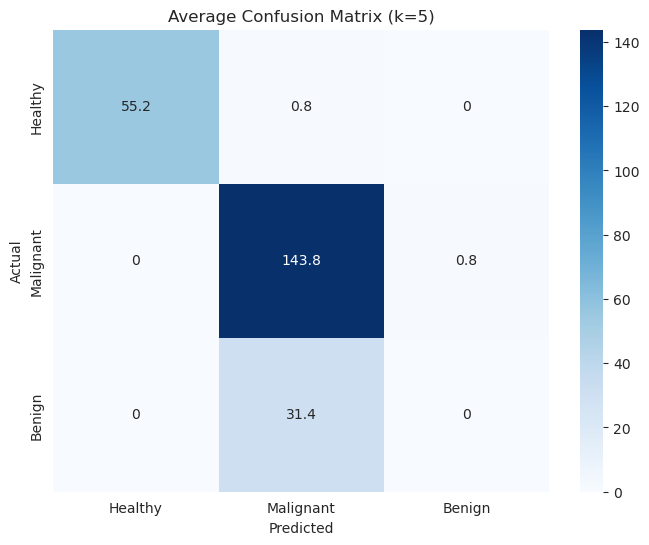

Average Accuracy (k=7): 0.86


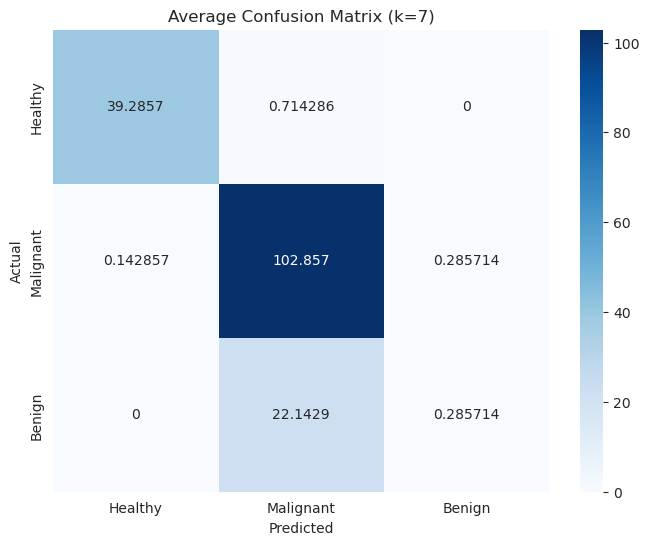

Average Accuracy (k=10): 0.86


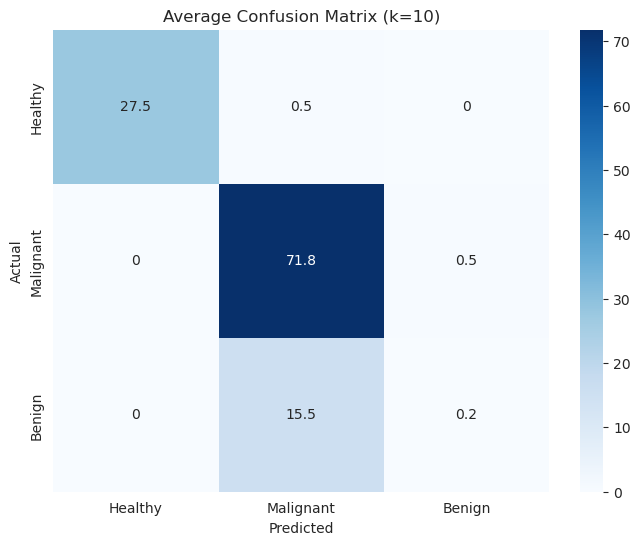

In [12]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Separate features (X) and labels (y)
X = df.drop('Phenotypes', axis=1)
y = df['Phenotypes']

# Lists to store results
accuracies = []
conf_matrices = []


# Perform k-fold cross-validation
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

# Load and preprocess data
df = pd.read_csv('../../data/ST001937_AN003150.csv')
df = df.drop(['Sample ID', 'RAW_FILE_NAME'], axis=1)
df['Phenotypes'] = df['Phenotypes'].apply(lambda x: 0 if x == 'Healthy Controls' else 1 if x == 'Maligant SPNS' else 2)
df.fillna(df.mean(), inplace=True)

# Separate features and labels
X = df.drop('Phenotypes', axis=1)
y = df['Phenotypes']

# Perform k-fold cross-validation and visualize results
for k in [3, 5, 7, 10]:
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    accuracies = []
    conf_matrices = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        rf_clf = RandomForestClassifier(random_state=42)
        rf_clf.fit(X_train, y_train)

        y_pred = rf_clf.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
        conf_matrices.append(confusion_matrix(y_test, y_pred))

    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_conf_matrix = sum(conf_matrices) / len(conf_matrices)

    print(f"Average Accuracy (k={k}): {avg_accuracy:.2f}")
    plt.figure(figsize=(8, 6))
    sns.heatmap(avg_conf_matrix, annot=True, fmt="g", cmap="Blues", xticklabels=['Healthy', 'Malignant', 'Benign'], yticklabels=['Healthy', 'Malignant', 'Benign'])
    plt.title(f"Average Confusion Matrix (k={k})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()